In [1]:
import numpy as np                  
import pandas as pd                
import matplotlib.pyplot as plt    
import seaborn as sns
import mysql.connector
from mysql.connector import Error


In [8]:
import os
print(os.getcwd())

c:\Users\marin\Desktop\Data Bootcamp\ProjecteData\Equip_11\Scripts


In [ ]:
# Ruta base: carpeta actual donde se ejecuta el notebook
BASE_DIR = os.getcwd()
# Ruta al archivo CSV
csv_path = os.path.join(BASE_DIR, '..', 'Data', 'RRHH - semana1.csv')
# Cargar CSV
df_RRHH = pd.read_csv(csv_path)

df_RRHH

,ID,Reason_absence,Month_absence,Day_week,Seasons,Transportation_expense,Distance_Residence_Work,Service_time,Age,Work_load_Average_day,...,Disciplinary_failure,Education,Son,Social_drinker,Social_smoker,Pet,Weight,Height,Body_mass_index,Absenteeism_hours
0,14,11,11,2,4,155,12,14,34,"284,031",...,0,1,2,1,0,0,95,196,25,120
1,36,13,4,4,3,118,13,18,50,"239,409",...,0,1,1,1,0,0,98,178,31,120
2,9,6,7,3,1,228,14,16,58,"264,604",...,0,1,2,0,0,1,65,172,22,120
3,28,9,7,3,1,225,26,9,28,"230,290",...,0,1,1,0,0,2,69,169,24,112
4,9,12,3,3,2,228,14,16,58,"222,196",...,0,1,2,0,0,1,65,172,22,112
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
735,2,0,6,2,3,235,29,12,48,"275,089",...,1,1,1,0,1,5,88,163,33,0
736,21,0,6,2,3,268,11,8,33,"275,089",...,1,2,0,0,0,0,79,178,25,0
737,4,0,0,3,1,118,14,13,40,"271,219",...,0,1,1,1,0,8,98,170,34,0
738,8,0,0,4,2,231,35,14,39,"271,219",...,0,1,2,1,0,2,100,170,35,0


# Tasa mensual de absentismo per capita (en horas)

Tasa = (Suma de horas de absentismo del mes) / (Número de empleados activos en el mes)

In [22]:
absentismo_kpi = df_RRHH.groupby('Month_absence').agg({
    'Absenteeism_hours': 'sum',
    'ID': pd.Series.nunique
}).rename(columns={'ID': 'Empleados_activos'})

absentismo_kpi['Tasa_per_capita'] = absentismo_kpi['Absenteeism_hours'] / absentismo_kpi['Empleados_activos']

absentismo_kpi


,Absenteeism_hours,Empleados_activos,Tasa_per_capita
Month_absence,,,
0,0,3,0.000000
1,222,13,17.076923
2,294,19,15.473684
3,765,22,34.772727
4,482,21,22.952381
5,400,24,16.666667
6,411,19,21.631579
7,734,23,31.913043
8,288,21,13.714286


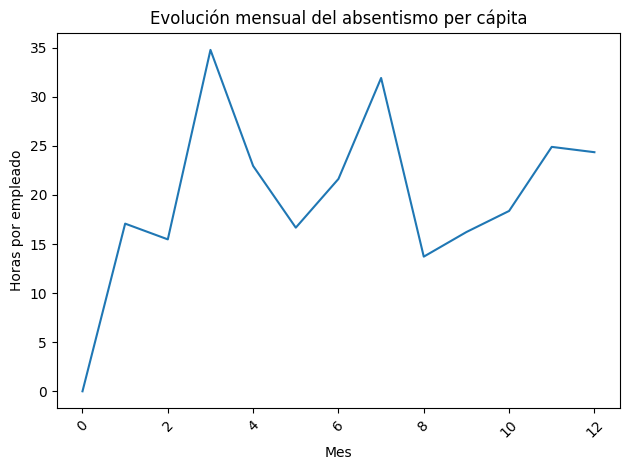

In [23]:
sns.lineplot(data=absentismo_kpi, x=absentismo_kpi.index, y='Tasa_per_capita')
plt.title('Evolución mensual del absentismo per cápita')
plt.ylabel('Horas por empleado')
plt.xlabel('Mes')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()